# Maddie's figures

In [1]:
import scanpy as sc
import scanpy.external as sce
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams

random_seed = 12345
np.random.seed(random_seed)

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor='white')

## Phate version

In [2]:
adata = sc.read("../data/processed/04_E3.5-E4.5.h5ad")
adata

Only considering the two last: ['.5', '.h5ad'].
Only considering the two last: ['.5', '.h5ad'].


AnnData object with n_obs × n_vars = 991 × 1071
    obs: 'Cluster', 'Timepoint', 'CellType', 'Library', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'Time_CellType', 'n_counts', 'velocity_self_transition'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'CellType_colors', 'Time_CellType_colors', 'Timepoint_colors', 'hvg', 'neighbors', 'pca', 'rank_dynamical_genes', 'recover_dynamics', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_phate', 'veloc

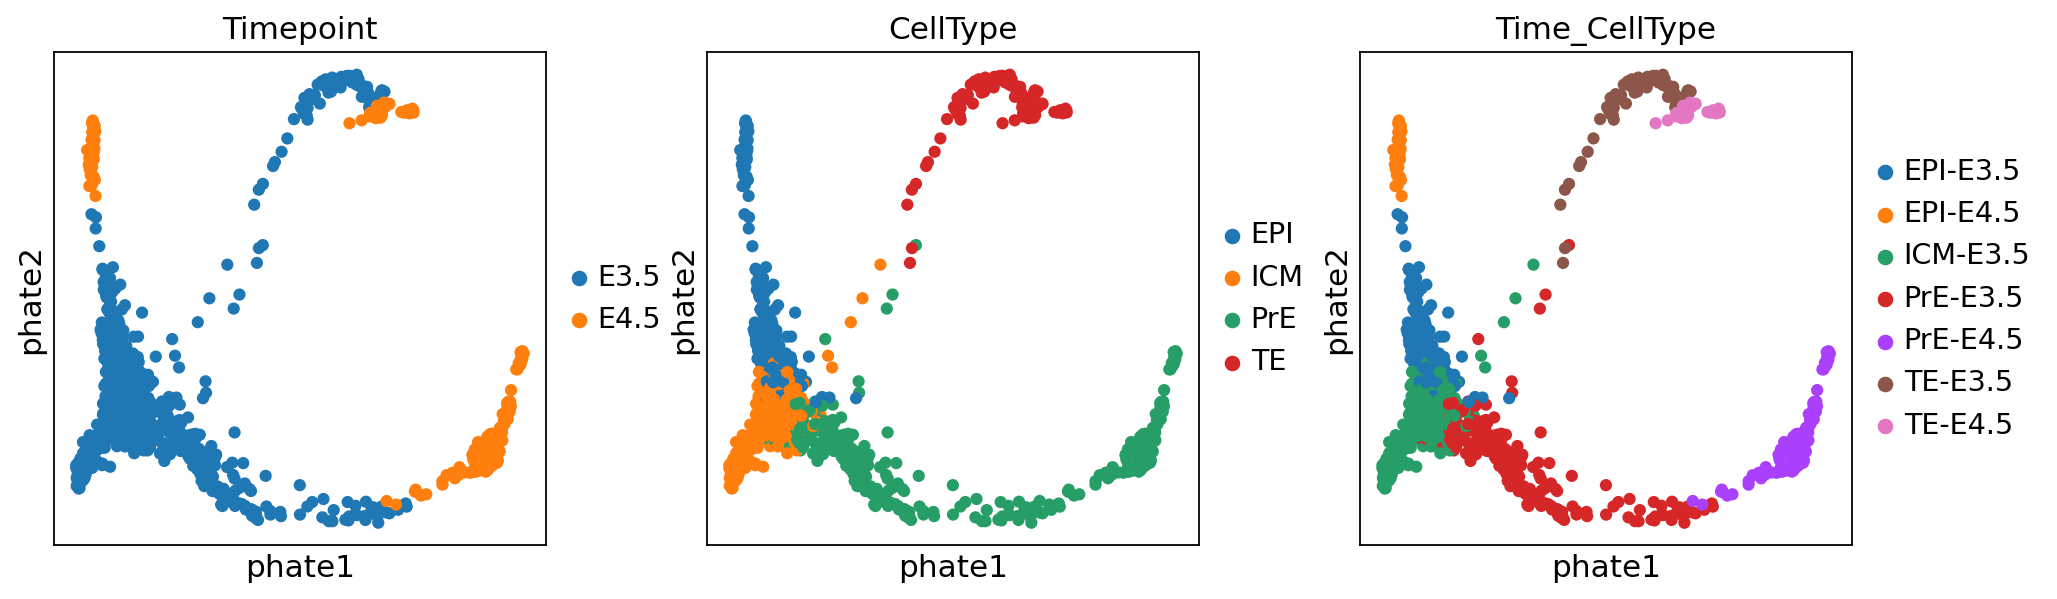

In [3]:
sce.pl.phate(adata, color=['Timepoint', 'CellType', 'Time_CellType'])

In [4]:
df = pd.DataFrame(adata.obsm['X_phate'], index=adata.obs_names, columns=['X_phate_1', 'X_phate_2'])
df['CellType'] = adata.obs.CellType
df['Pou5f1'] = np.ravel(adata.raw.to_adata()[:, 'pou5f1'].X.todense())
df

,X_phate_1,X_phate_2,CellType,Pou5f1
index,,,,
Lib1-3_E3.5_TTTATGCTCAGCTGGC,-0.007363,-0.009038,PrE,2.977860
Lib1-3_E3.5_TTTATGCTCGCGGATC,-0.007014,-0.009927,PrE,2.661086
Lib1-3_E3.5_TTTACTGAGAAACCAT,-0.011263,-0.007854,ICM,2.503141
Lib1-3_E3.5_TTTGTCAGTCAAACTC,-0.022037,-0.011758,ICM,2.247547
Lib1-3_E3.5_TTATGCTCACCCAGTG,-0.018433,0.003195,EPI,2.997847
...,...,...,...,...
Lib1-2_E4.5_CCATTCGTCTATGTGG,0.042688,-0.013318,PrE,1.592167
Lib1-2_E4.5_CCAATCCTCGGAGCAA,0.024327,0.039051,TE,0.267906
Lib1-2_E4.5_CCGTGGAGTTCGTGAT,0.048216,0.003468,PrE,0.529278


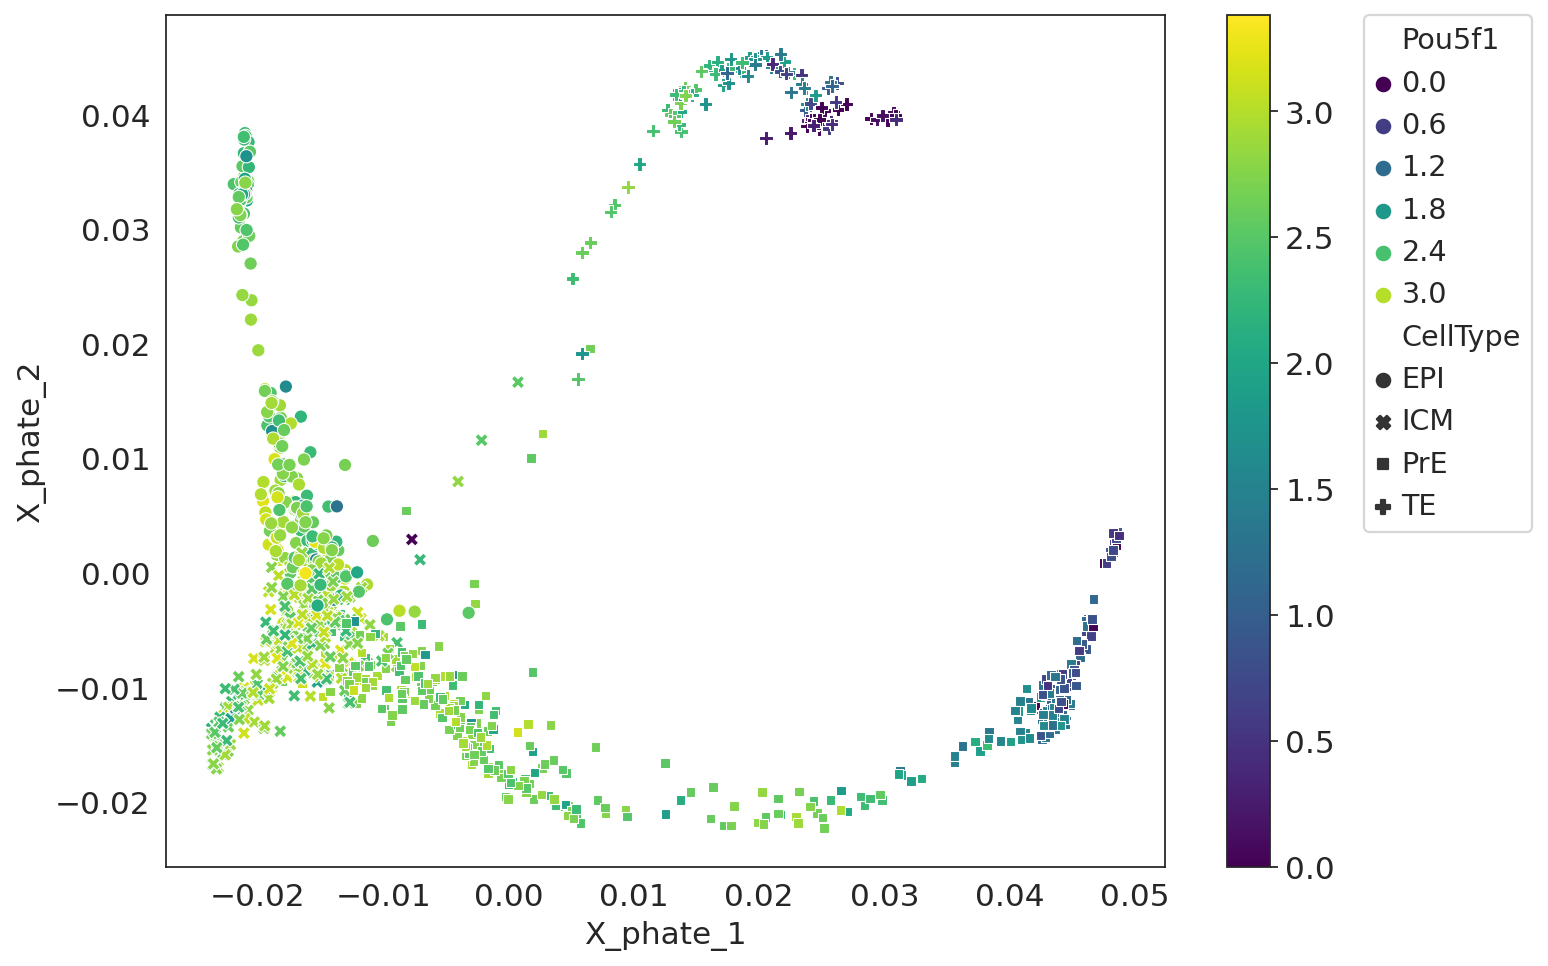

In [5]:
rcParams['figure.figsize'] = [10, 7]
sns.set_style("white")
ax = sns.scatterplot(x='X_phate_1', y='X_phate_2', data=df, hue='Pou5f1', palette='viridis', style='CellType')

norm = plt.Normalize(df['Pou5f1'].min(), df['Pou5f1'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0)

# Remove the legend and add a colorbar
# ax.get_legend().remove()
ax.figure.colorbar(sm)

plt.show()

## Vanilla imputed version

In [6]:
vanilla = sc.read('../data/processed/kat-replicated.h5')

In [7]:
vanilla = vanilla[vanilla.obs.CellType != 'TE'].copy()
vanilla.X = vanilla.layers['magic']

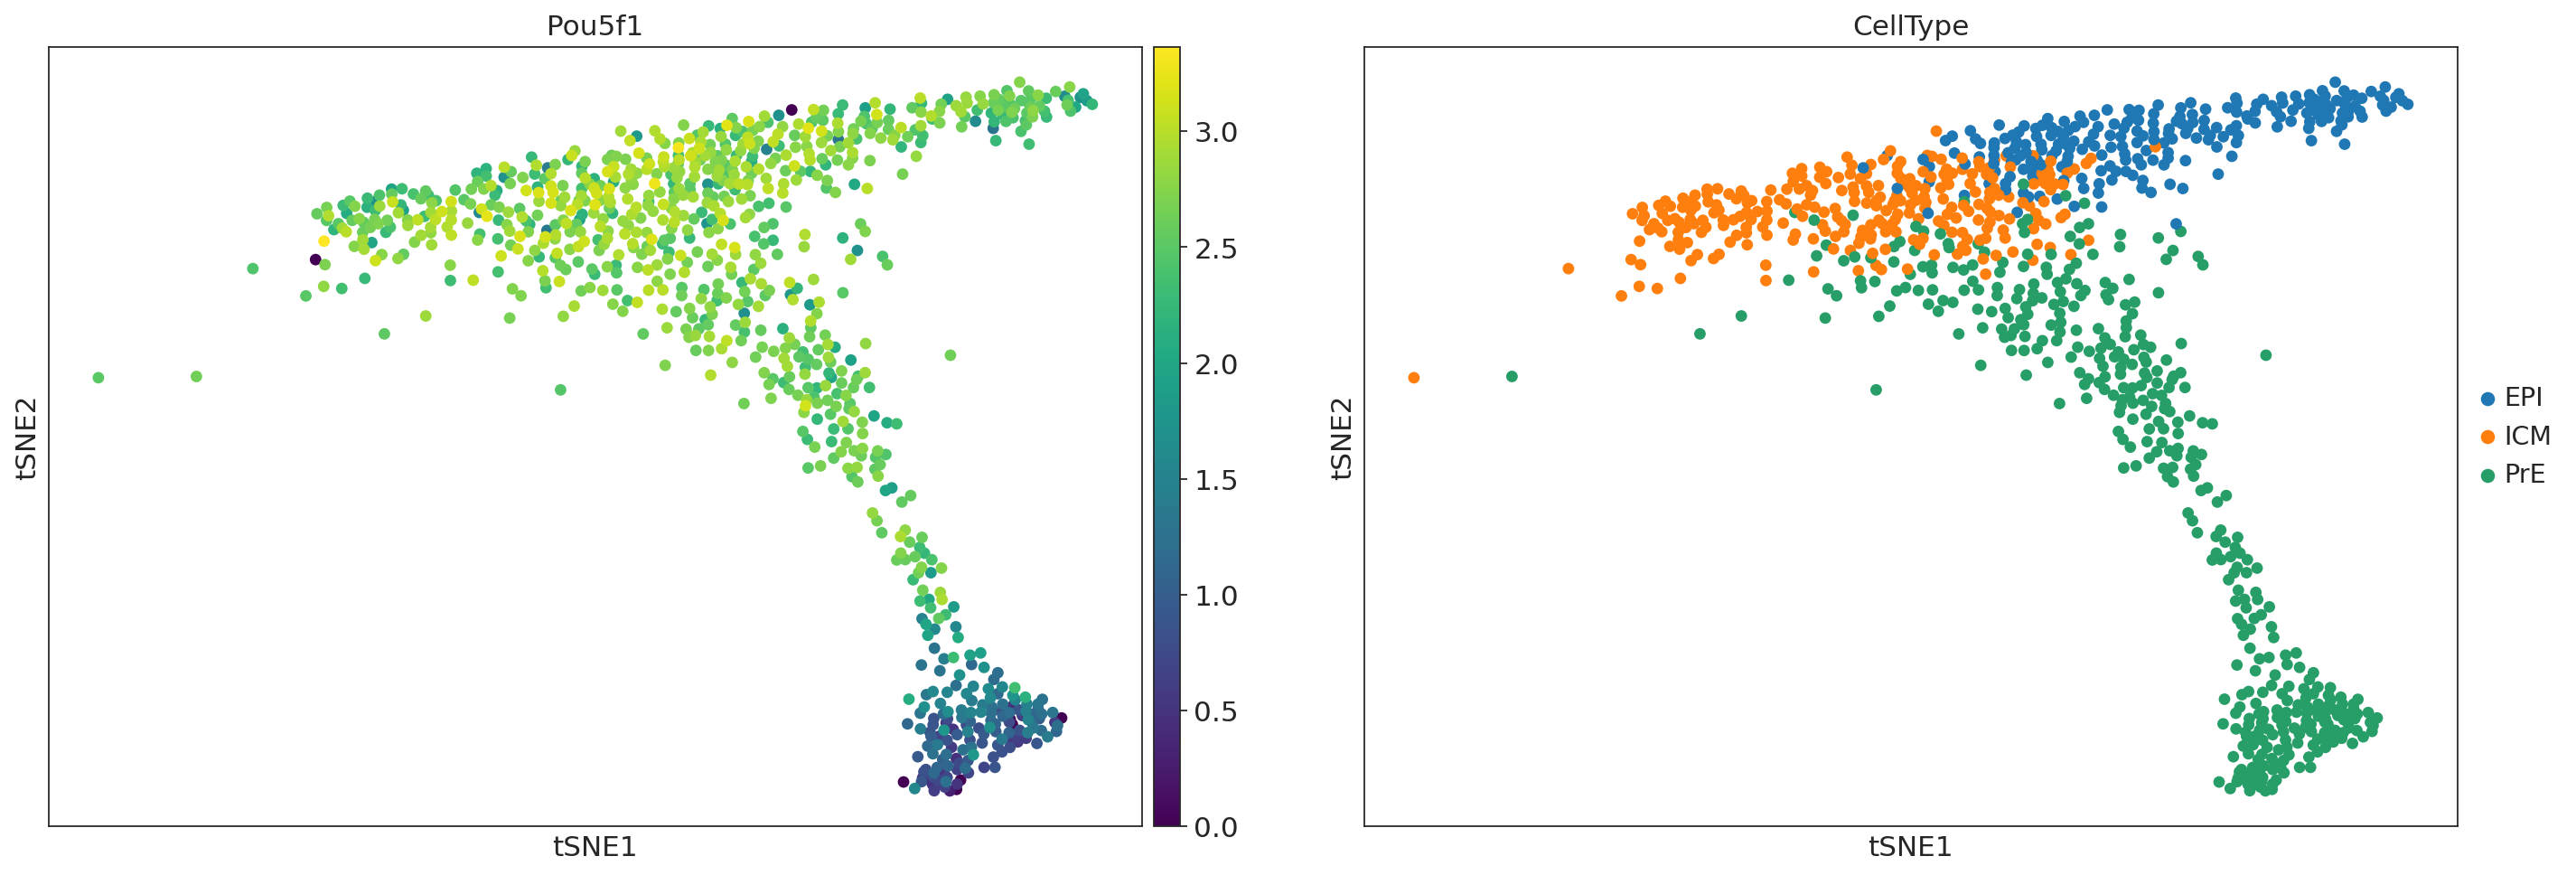

In [8]:
sc.pl.tsne(vanilla, color=['Pou5f1', 'CellType'], cmap='viridis')

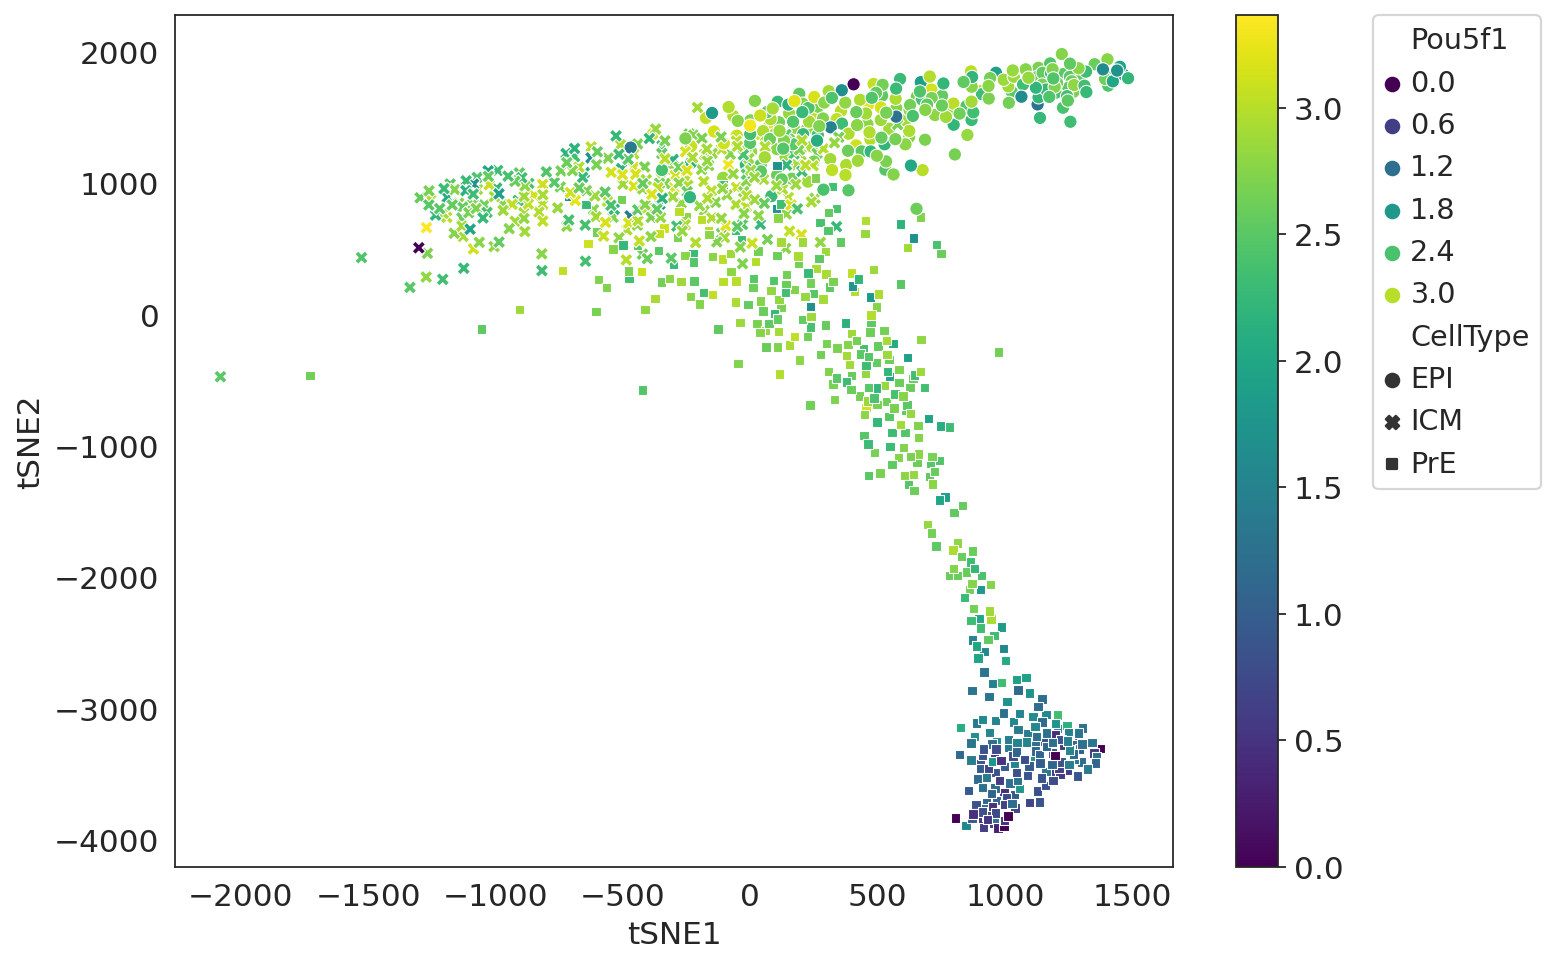

In [9]:
df = pd.DataFrame(vanilla.obsm['X_tsne'], index=vanilla.obs_names, columns=['tSNE1', 'tSNE2'])
df['CellType'] = vanilla.obs.CellType
df['Pou5f1'] = np.ravel(vanilla.raw.to_adata()[:, 'Pou5f1'].X.todense())

rcParams['figure.figsize'] = [10, 7]
sns.set_style("white")
ax = sns.scatterplot(x='tSNE1', y='tSNE2', data=df, hue='Pou5f1', palette='viridis', style='CellType')

norm = plt.Normalize(df['Pou5f1'].min(), df['Pou5f1'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0)

# Remove the legend and add a colorbar
# ax.get_legend().remove()
ax.figure.colorbar(sm)

plt.show()

In [10]:
genes_early = ['Pou5f1', 'Gata6', 'Idh1', 'Fgfr2', 'Klf5', 'Tbx3']
genes_late = ['Gata4', 'Col4a1', 'Hnf4a', 'Foxa2', 'Vegfa', 'Cited1']

genes = genes_early + genes_late

In [11]:
adata_sub = vanilla[vanilla.obs.sort_values(by='pseudotime').index, genes].copy()
adata_sub = adata_sub[adata_sub.obs.CellType != 'EPI'].copy()
adata_sub.obs['ct'] = adata_sub.obs[['Timepoint', 'CellType']].agg('-'.join, axis=1).astype('category')

adata_sub

AnnData object with n_obs × n_vars = 677 × 12
    obs: 'Cluster', 'Timepoint', 'CellType', 'pseudotime', 'ct'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'CellType_colors'
    obsm: 'X_tsne'
    layers: 'magic'

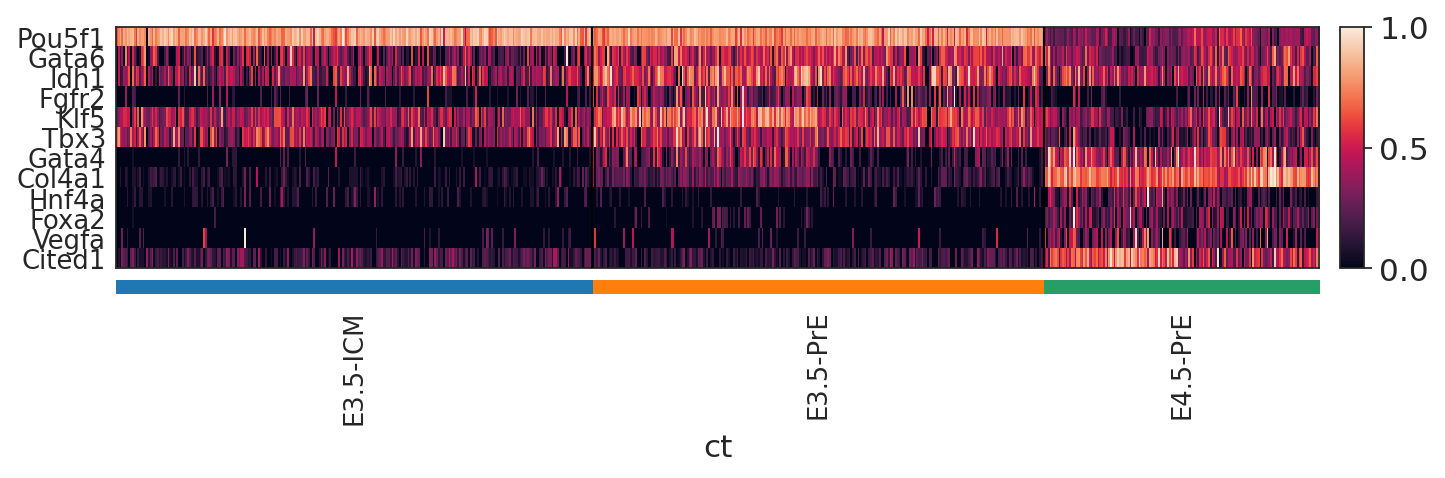

In [12]:
sc.pl.heatmap(adata_sub, var_names=genes, groupby='ct', swap_axes=True, standard_scale='var')

saving figure to file ./figures/scvelo_heatmap_maddie_scvelo.svg


ValueError: 'bboxes' cannot be empty

<Figure size 4500x1200 with 5 Axes>

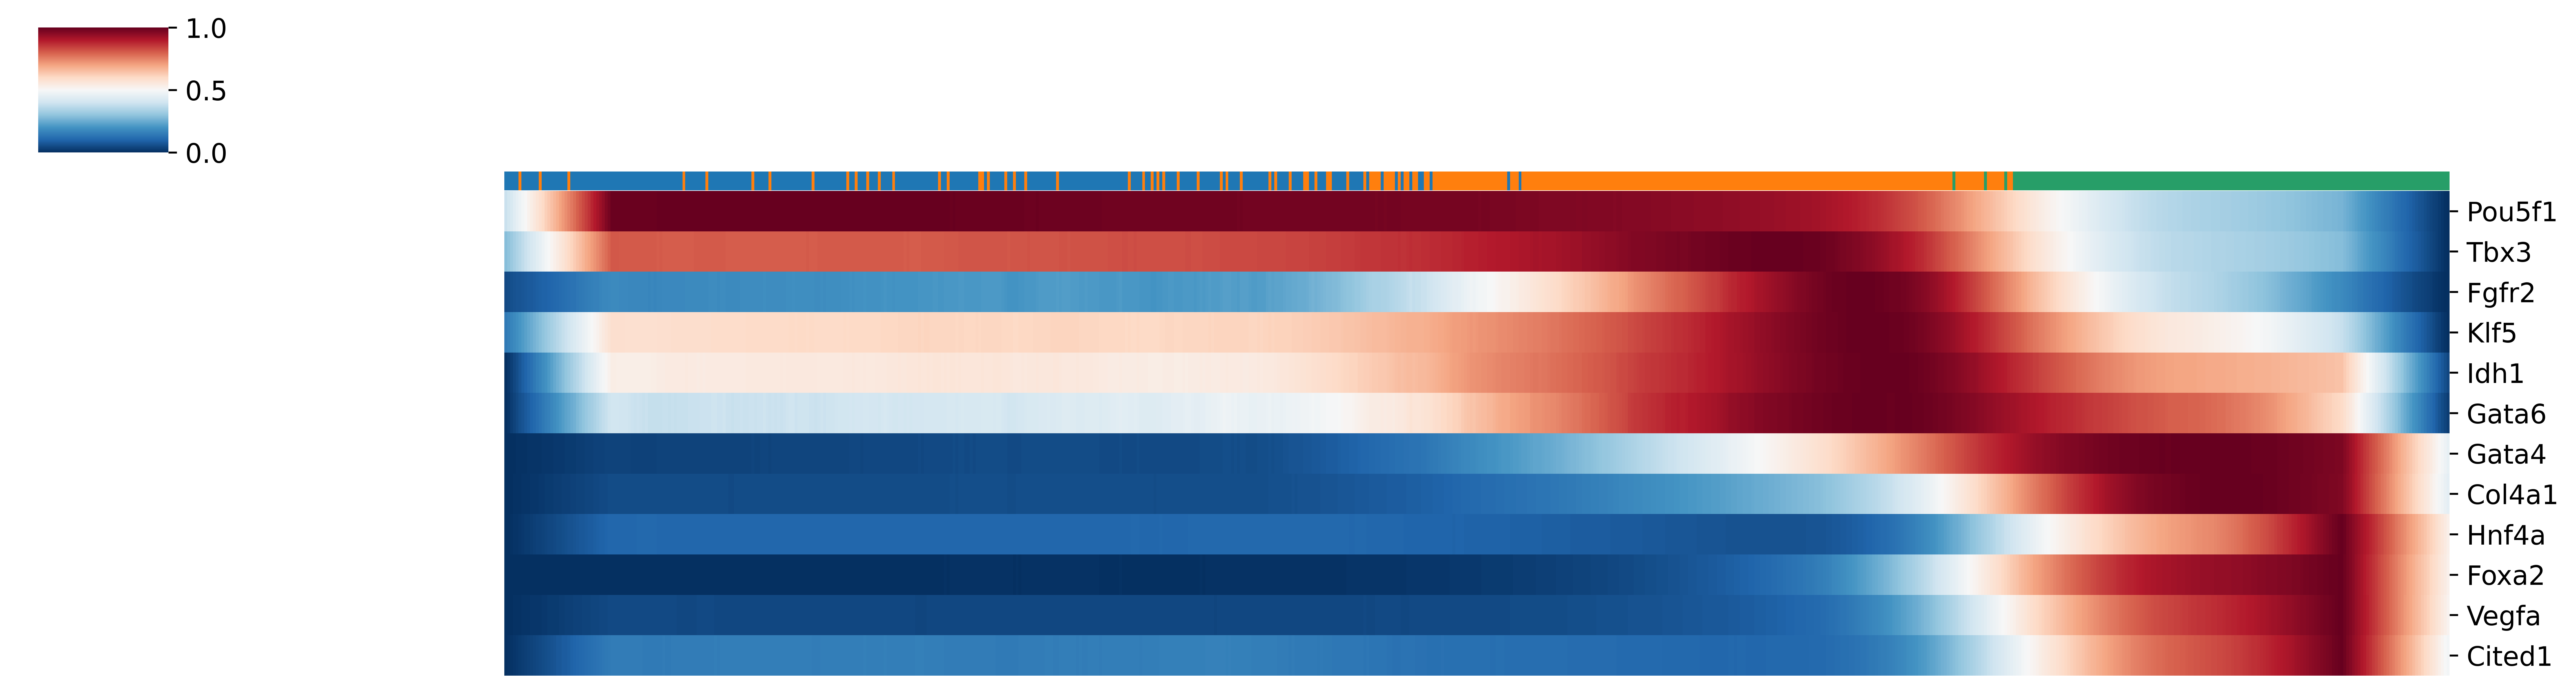

saving figure to file ./figures/scvelo_heatmap_maddie_scvelo.png


ValueError: 'bboxes' cannot be empty

<Figure size 4500x1200 with 5 Axes>

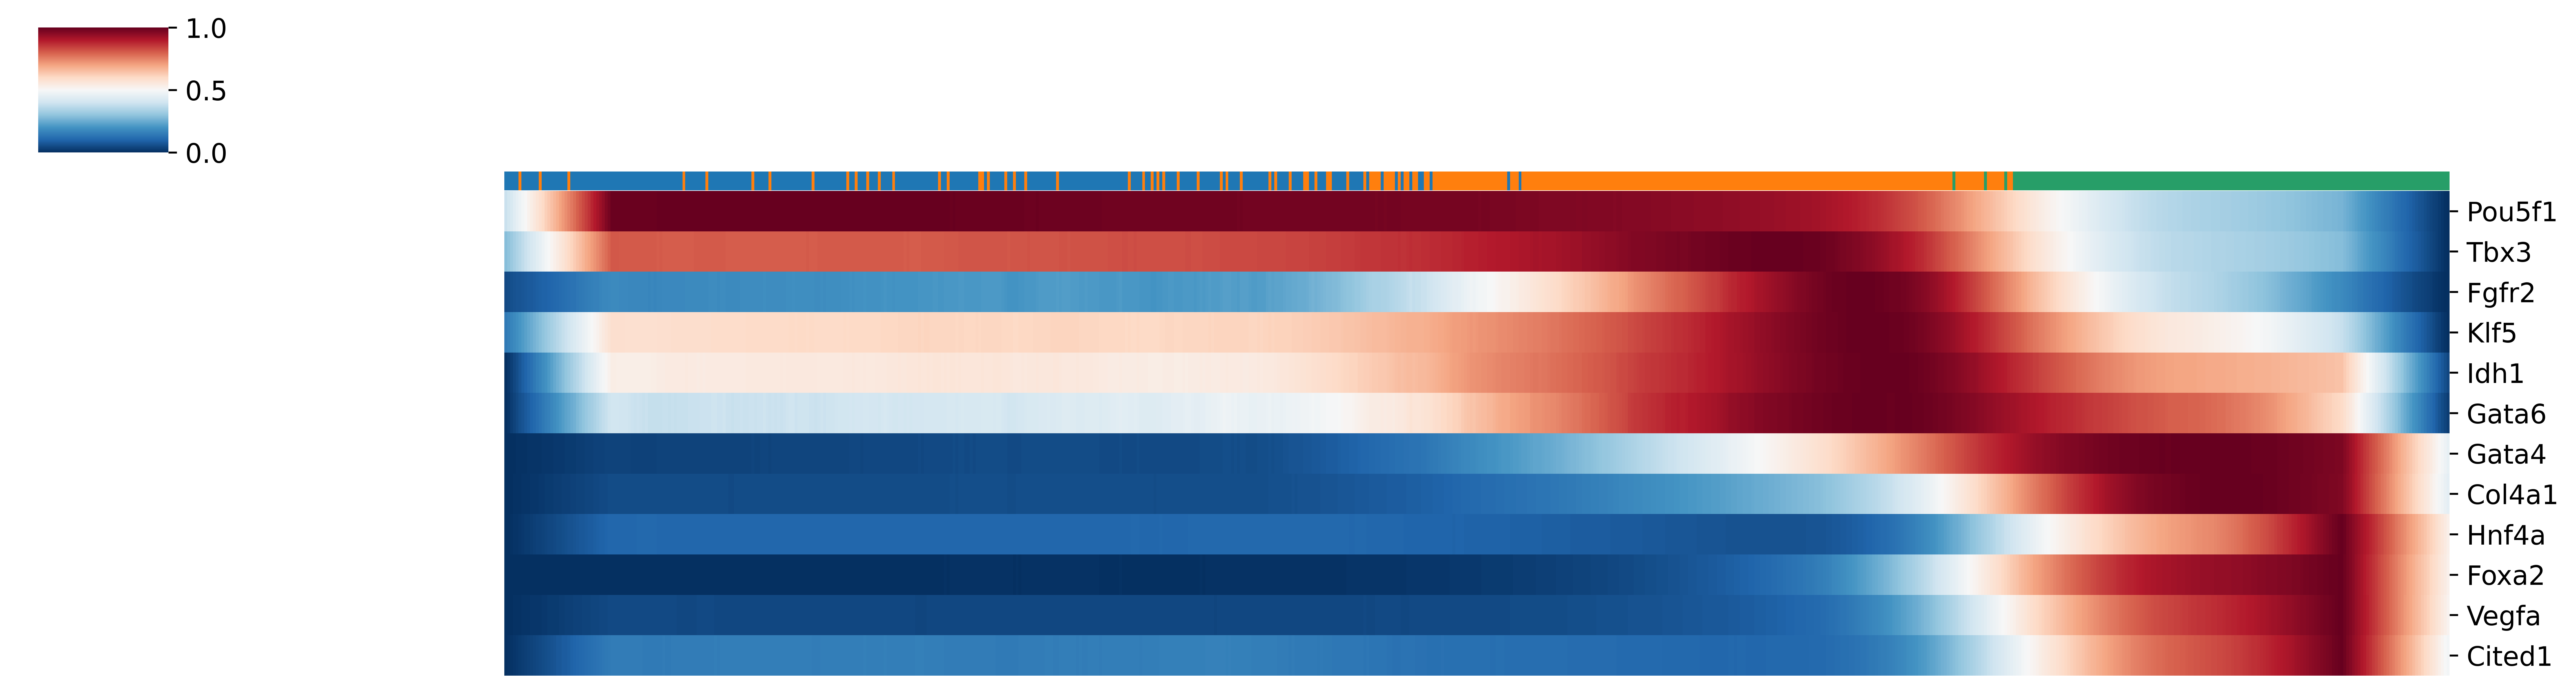

In [23]:
import matplotlib
import scvelo as scv
scv.settings.set_figure_params(dpi=300, facecolor='white')

cmap_reversed = matplotlib.cm.get_cmap('RdBu_r')

scv.pl.heatmap(adata_sub, var_names=genes, sortby='pseudotime', col_color='ct', n_convolve=75, figsize=[15, 4], 
               color_map=cmap_reversed, save="maddie_scvelo.svg", colorbar=True, cbar_pos='left')
scv.pl.heatmap(adata_sub, var_names=genes, sortby='pseudotime', col_color='ct', n_convolve=75, figsize=[15, 4], 
               color_map=cmap_reversed, save="maddie_scvelo.png", colorbar=True, cbar_pos='left')

In [18]:
# import matplotlib.pyplot as plt

adata_sub.obs['dpt_pseudotime'] = adata_sub.obs['pseudotime']
adata_sub.obs['distance'] = adata_sub.obs['dpt_pseudotime']

In [ ]:
paths = [('ICM', ['E3.5-ICM']),
         ('Mid', ['E3.5-PrE']),
         ('Late', ['E4.5-PrE'])]

_, axs = plt.subplots(ncols=3, figsize=(12, 4), gridspec_kw={'wspace': 0.05, 'left': 0.12})
plt.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(paths):
    _, data = sc.pl.paga_path(
        adata_sub, path, genes,
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=10,
        annotations=['distance'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='Greys',
        groups_key='ct',
        color_maps_annotations={'distance': 'viridis'},
        title=f'{descr}',
        return_data=True,
        show=False)
#     data.to_csv('./write/paga_path_{}.csv'.format(descr))
# pl.savefig('./figures/paga_path_paul15.pdf')
plt.show()